<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/auido%20gan%20ting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from scipy.signal import stft
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from IPython.display import Audio
import librosa.display

In [2]:
# Read the audio file
y, sr = librosa.load('/content/drive/MyDrive/bass samples/NBdusty.wav', mono=True)
# Play the audio
Audio(y,rate=sr)

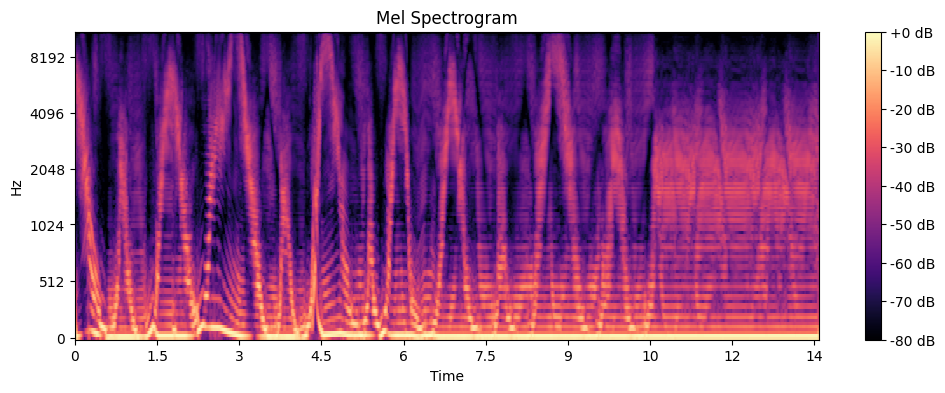

In [3]:
# Apply pre-emphasis filter
#pre_emphasis = 0.97
#emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

# Compute the short-time Fourier transform (STFT)
hop_length = 256
n_fft = 2048
D = librosa.stft(y, hop_length=hop_length, n_fft=n_fft, window='hann')

# Compute magnitude spectrogram
magnitude = np.abs(D)

# Convert to Mel scale
n_mels = 124
mel_spec = librosa.feature.melspectrogram(sr=sr, S=magnitude**2, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [10]:
# Compute mel spectrogram
hop_length = 512 # adjust according to time and sample rate
win_length = 2048   # adjust according to time and sample rate

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=hop_length, win_length=win_length)

# Convert mel spectrogram to linear frequency spectrogram
filterbank = librosa.filters.mel(sr=sr, n_fft=2048,fmax=20000)
linear_spectrogram = np.dot(filterbank.T, mel_spectrogram)

# Reconstruct audio using Griffin-Lim algorithm
reconstructed_audio = librosa.griffinlim(linear_spectrogram,n_iter=32, hop_length=hop_length, win_length=win_length)
# Play the audio
Audio(reconstructed_audio,rate=sr)

ParameterError: ignored

In [22]:
win_length = n_fft  # Window length

# Convert Mel spectrogram to audio
audio = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

# Play the audio
Audio(audio,rate=sr)

In [12]:
# Determine the parameters
sample_rate = sr # Sample rate of the audio file
desired_length = 1  # Desired length of each batch in seconds
stride_length = 0.5  # Stride length in seconds

# Convert stride length to frames
stride_frames = librosa.time_to_frames(stride_length, sr=sample_rate)

# Perform STFT on the audio file
X = librosa.stft(x)

# Convert desired length to frames
desired_frames = librosa.time_to_frames(desired_length, sr=sample_rate)

# Iterate through the spectrogram and split into batches
num_frames = X.shape[1]
batches = []
for i in range(0, num_frames - desired_frames + 1, stride_frames):
    batch = X[:, i:i + desired_frames]
    if batch.shape[1] < desired_frames:
        pad = np.zeros((X.shape[0], desired_frames - batch.shape[1]))
        batch = np.concatenate((batch, pad), axis=1)
    batches.append(batch)

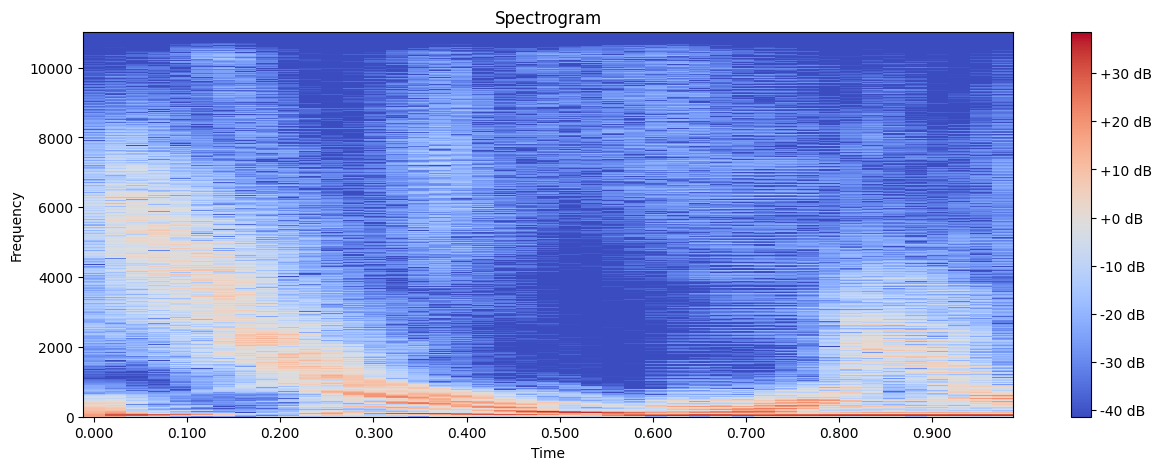

In [20]:
Xtest = librosa.amplitude_to_db(np.abs(batches[0]))

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xtest, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.show()

In [14]:
print(Xtest)

[[-15.366291    -0.28170726  -3.68988    ... -17.185133   -11.968588
  -14.723619  ]
 [ -6.7149353   -1.5368795   -9.38444    ...  -1.0235386   -6.1954017
  -29.276896  ]
 [  2.833273     1.5836935  -10.16203    ...  -1.9721181   -1.8274245
   -6.7111354 ]
 ...
 [-41.461594   -41.461594   -41.461594   ... -41.461594   -41.461594
  -41.461594  ]
 [-41.461594   -41.461594   -41.461594   ... -41.461594   -41.461594
  -41.461594  ]
 [-41.461594   -41.461594   -41.461594   ... -41.461594   -41.461594
  -41.461594  ]]


In [21]:
# Save audio signal as WAV file
wavfile.write('output.wav', sample_rate, combined_array)

NameError: ignored

In [19]:
# Convert the spectrogram back to audio using inverse STFT
reconstructed_audio = librosa.istft(batches[0])

# Specify the path to the audio file
audio_path = '/content/test/test.wav'

# Play the audio
Audio(reconstructed_audio,rate=sr)